#Importar Data

In [0]:
import pandas as pd

In [2]:
df = pd.read_csv("Titanic_Limpio.csv")
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
0,0,3,1,1,0,2,4,0,73,11
1,1,1,0,1,0,0,0,3,136,12
2,1,3,0,0,0,2,7,0,251,8
3,1,1,0,1,0,2,7,3,198,12
4,0,3,1,0,0,2,7,1,11,11


#Árbol de Clasificación

In [0]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [0]:
# Entrenamos un arbol con poca profundidad, para visualizarlo comodamente:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth=3)
m = m.fit(x, y)

In [0]:
m.score(x,y)

0.8316498316498316

# ¿Cómo saber si el modelo esta haciendo un buen trabajo?

Vamos a separar la data en 2 conjuntos: uno para entrenar el modelo (**train set**) y otro para validar el modelo (**validation set**).

In [5]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (712, 9)
Validation shape:  (179, 9)


In [6]:
x_train.head()

,Pclass,Sex,SibSp,Parch,Embarked,Edad,Tarifa,Lname,NamePrefix
331,1,1,0,0,2,0,2,468,11
733,2,1,0,0,2,4,1,55,11
382,3,1,0,0,2,7,0,602,11
704,3,1,1,0,2,7,0,235,11
813,3,0,4,2,2,2,3,16,8


### a. Entrenar un árbol de decisión con la data de entrenamiento.

In [0]:
m2 = DecisionTreeClassifier(max_depth=3)
m2 = m2.fit(x_train,y_train)

### b. Evaluar el resultado con la data de entrenamiento.

In [8]:
m2.score(x_train,y_train)

0.8384831460674157

### c. Evaluar el resultado con la data de validación.

In [9]:
m2.score(x_val,y_val)

0.8044692737430168

###d. Encontrando el valor optimo para max_depth

In [0]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 15))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

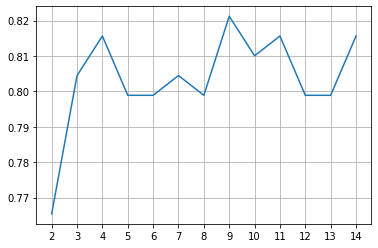

In [12]:
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

###e. Graficando nuestro arbol

In [0]:
from sklearn.tree import export_graphviz
import graphviz

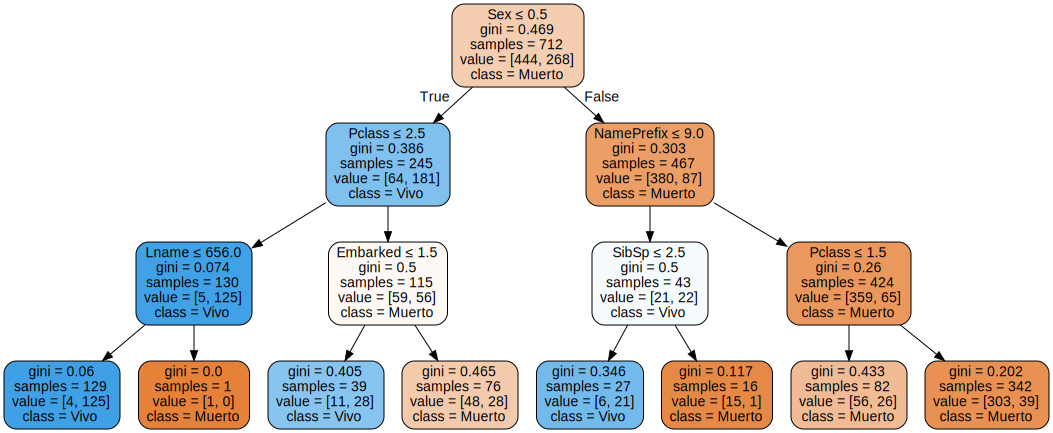

In [14]:
dot_data = export_graphviz(m2,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#graph.render("arbol",format='png') 

#Árbol de Regresión

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
regresion = DecisionTreeRegressor(max_depth = 3)
regresion = regresion.fit (x_train, y_train)

In [17]:
regresion.score(x_val,y_val)

0.43331801729429636

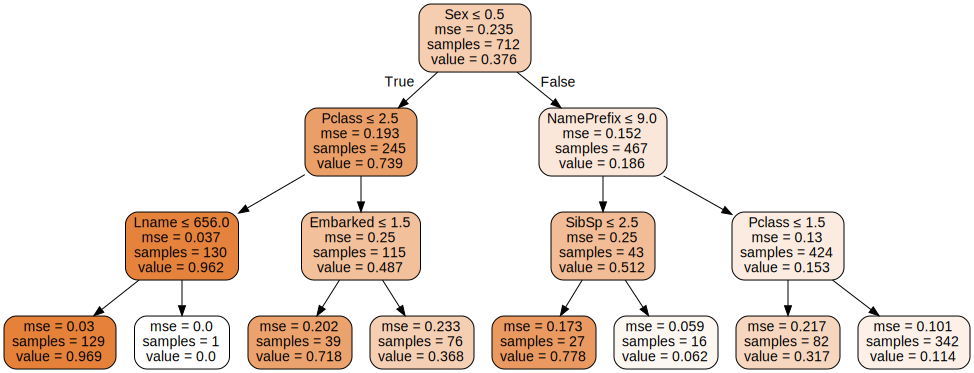

In [18]:
dot_data = export_graphviz(regresion,feature_names= x.columns, class_names= ['Muerto','Vivo'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph